# Más gráficos: `Plotly`

`Plotly` es una biblioteca similar a `Matplotlib`. Su origen es una biblioteca en JavaScript para utilizar en el desarrollo de aplicaciones web, pero con el tiempo fue extendida con distintos _bindings_ para R, Julia, y, por supuesto, Python.

Una de las características de `Plotly` es que tiene un mayor grado nativo de interactividad que Matplotlib.

`Plotly` viene en dos sabores:
- `plotly.express`, es una biblioteca orientada a trabajar con datos con algún tipo de formato (típicamente `csv`), y está orientada a poder usarse con `pandas` que es una biblioteca para procesar datos. `pandas` puede leer fácilmente tablas de datos, que se pueden graficar eficientemente con `plotly.express`.
- `graph_objects`, es el submódulo para graficar más similar a `Matplotlib`.

Finalmente, verán en la [documentación](https://plotly.com/python/) referencias a `Dash`, que es otra biblioteca que permite directamente publicar gráficos en un servicio en la nube, que, por supuesto, provee la companía que produce `Plotly`. 

Sin embargo, `Plotly` es completamente libre.

`Plotly` se instala usando `pip`:

`pip install plotly==5.6.0`

o `conda`:

`conda install -c plotly plotly=5.6.0`


In [ ]:
import plotly.graph_objects as go
import numpy as np
print(np.__version__)


Definimos un conjunto de 51 datos equiespaciados entre 0 y 4, y la función

$$
y = f(x) = 2.5 e^{-1.3 x} + 0.5. e^{-1.6 x}
$$

Además, definimos un conjunto de datos _con ruido_, sumando a $y$ un ruido gaussiano de media 0 y dispersión 1 (ver `help(np.random.normal)`):

In [ ]:
x = np.linspace(0,4,51)
y = 2.5 * np.exp(-1.3 * x) + 0.5 * np.exp(-1.6 * x)
ruido = 0.2 * np.random.normal(size=x.size)
medicion = y + ruido

print(x.size)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x,y=y))
fig.show() # Se muestra el gráfico en la pantalla

In [ ]:
print(fig)

Para `Plotly`, cualquier objeto gráfico es representado en un árbol de atributos. Los atributos se componen de una lista de diccionarios de Python que representan las distintas características del gráfico.
Hay tres atributos básicos
- `data` que, justamente, representa los datos a graficar
- `layout`, que describe la representación del gráfico
- `frames`, que se utiliza para hacer animaciones.

En el caso del atributo `data`, tiene más de 40 tipos de diccionarios distintos, que se denominan `trazos` (_traces_). Cada uno de éstos representa un tipo de gráfico.


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
     x=x
    ,y=y))
fig.add_trace(go.Scatter(
     x=x
    ,y=medicion))
fig.show()

In [ ]:
print(fig)

In [ ]:
fig = go.Figure()
datos = dict(type='scatter'
             ,x=x
             ,y=y)
datos_medidos = dict(type='scatter'
             ,x=x
             ,y=medicion)
fig.add_trace(datos)
fig.add_trace(datos_medidos)
fig.show()
    

### Líneas, símbolos y colores



In [ ]:

fig = go.Figure()

fig.add_trace(go.Scatter(
     x=x
    ,y=y
    ,line=dict(color='black',width=2)))
fig.add_trace(go.Scatter(x=x,y=medicion,
                         line=dict(
                             color='royalblue'
                             ,width=4
                             ,dash='dash')))
fig.show()

Los siguientes caracteres pueden utilizarse para controlar el símbolo de graficación:


<div>
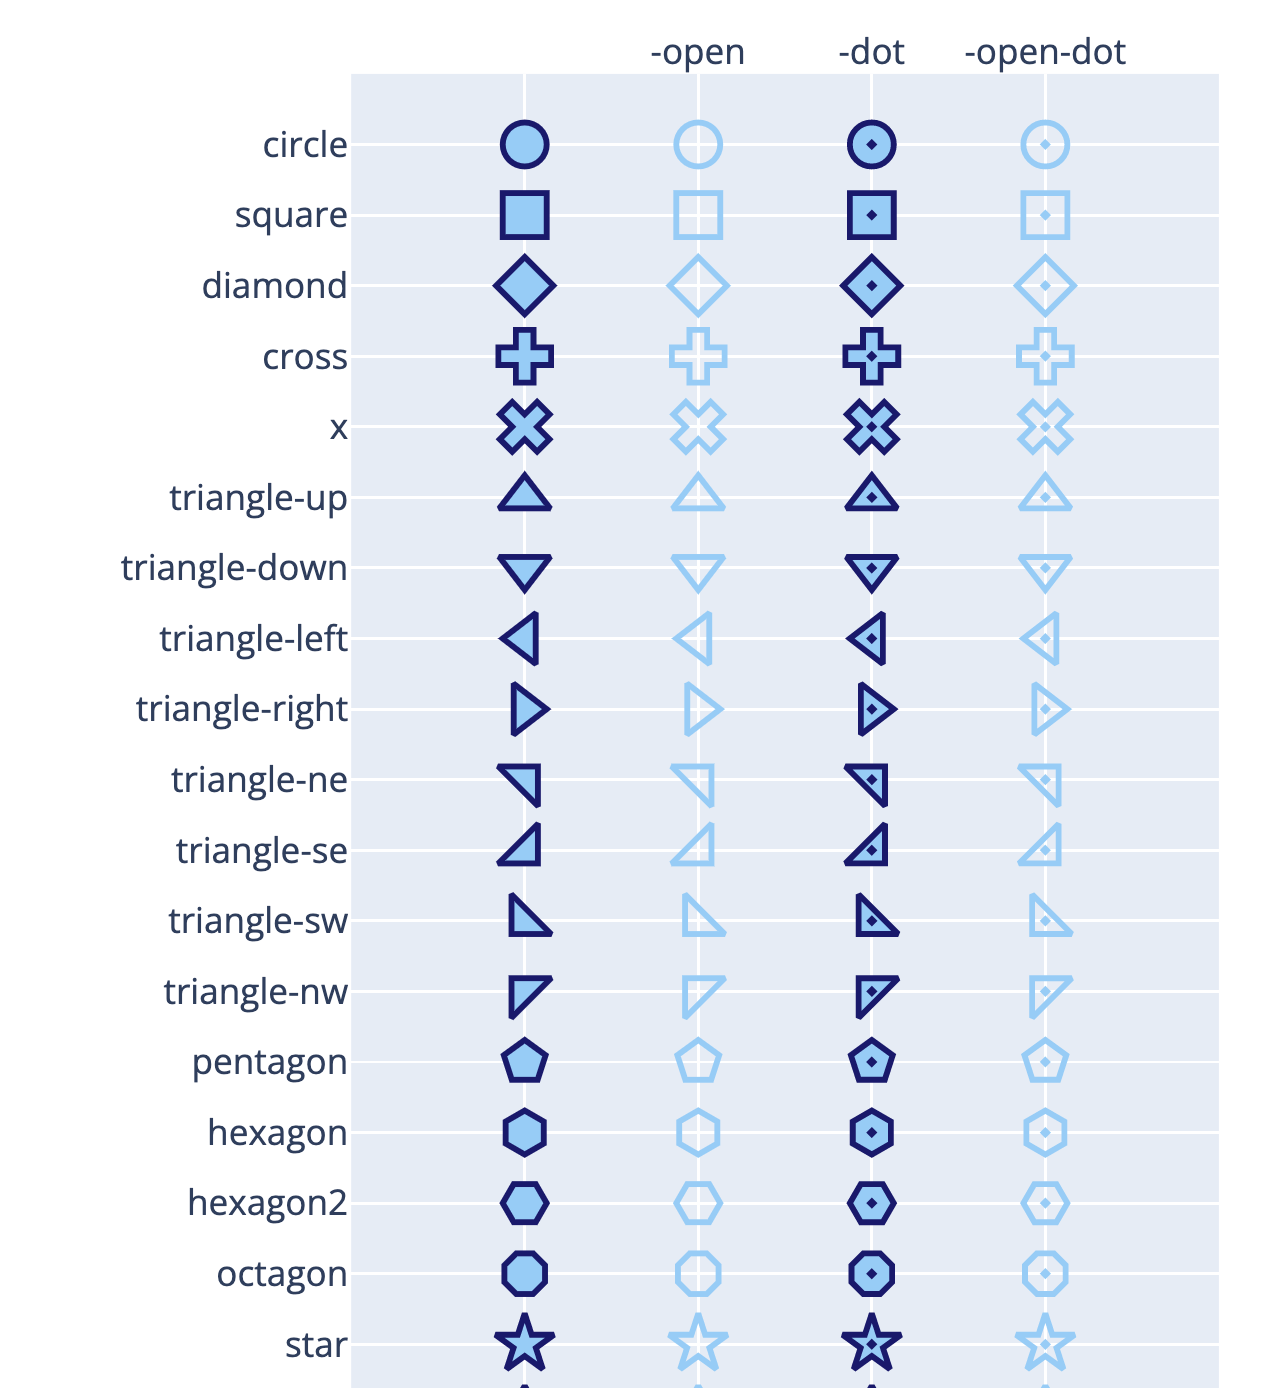
</div>


In [ ]:
help(go.Scatter())

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=x,y=y,line=dict(color='black',width=2)))
fig.add_trace(go.Scatter(x=x,y=medicion,mode='lines+markers',line=dict(color='red',width=2,dash='dot'),marker=dict(color='red',symbol='circle-open',size=10)))
fig.show()

### Nombres de ejes y leyendas

Vamos ahora a agregar nombres a los ejes y a las curvas.

Para agregar nombres a las curvas, tenemos que agregar un `label`, en este caso en el mismo comando `plot()`, y luego
mostrarlo con `legend()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x,y=y,name='Teoría',line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=x,y=medicion,name='Medición',mode='lines+markers',
                         line=dict(color='red',width=2,dash='dot'),
                         marker=dict(color='red',symbol='circle',size=10,line_width=2,line_color="midnightblue")))


fig.show()

Para agregar nombres a los ejes usamos `xlabel` y `ylabel`:
Los títulos a la figura se pueden agregar con `title`:

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x
    ,y=y
    ,name='Teoría'
    ,line=dict(
         color='blue'
        ,width=2)
    ))
fig.add_trace(go.Scatter(
     x=x
    ,y=medicion
    ,name='Medición'
    ,mode='lines+markers'
    ,line=dict(
        color='red'
        ,width=2
        ,dash='dot')
    ,marker=dict(
        color='red'
        ,symbol='circle'
        ,size=10
        ,line_width=2
        ,line_color="midnightblue")))

fig.update_layout(
    title="Resultados",
    xaxis_title="Tiempo [seg]",
    yaxis_title="Valor [mV]",
    legend_title="Referencias",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ),
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.8)
)

fig.show()

Podemos tambien graficar lineas verticales y horizontales usando `axvline` y `axhline`

In [ ]:
fig.add_hline(y=1.5)
fig.add_vline(x=2.5, line_width=3, line_dash="dash", line_color="green")
fig.show()

Para pasar a escala logarítmica actualizamos los ejes con `update_xaxes` o `update_yaxes`:

In [ ]:
fig.update_xaxes(type='log')

fig.show()

### Dos gráficos en la misma figura

Tenemos que importar el módulo `subplots`:

In [ ]:
from plotly.subplots import make_subplots

fig = go.Figure()


fig = make_subplots(rows=1,cols=2,
                   subplot_titles = ('Resultados escala logarítmica',
                                     'Resultados escala lineal'))


fig.add_trace(go.Scatter(
    x=x
    ,y=y
    ,name='Teoría'
    ,line=dict(
         color='blue'
        ,width=2)
    )
    ,row=1,col=1)
fig.add_trace(go.Scatter(
     x=x
    ,y=medicion
    ,name='Medición'
    ,mode='lines+markers'
    ,line=dict(
        color='red'
        ,width=2
        ,dash='dot')
    ,marker=dict(
        color='red'
        ,symbol='circle'
        ,size=10
        ,line_width=2
        ,line_color="midnightblue"))
    ,row=1,col=1)

fig.add_trace(go.Scatter(
    x=x
    ,y=y
    ,name='Teoría'
    ,line=dict(
         color='blue'
        ,width=2)
    )
    ,row=1,col=2)
fig.add_trace(go.Scatter(
     x=x
    ,y=medicion
    ,name='Medición'
    ,mode='lines+markers'
    ,line=dict(
        color='red'
        ,width=2
        ,dash='dot')
    ,marker=dict(
        color='red'
        ,symbol='circle'
        ,size=10
        ,line_width=2
        ,line_color="midnightblue"))
    ,row=1,col=2)

                    
                    
                    
fig.update_xaxes(type='log',
                    row=1,col=1)                    
                    
                    
                    


In [ ]:
print(type(fig_1))

### Exportar las figuras

El output sugerido de `Plotly` es un archivo `.html`. 
> Estos archivos conservan la interactividad del gráfico!

In [ ]:
fig.write_html('fig1.html')

[Para obtener un gráfico estático](https://plotly.com/python/static-image-export/), es necesario contar con el módulo `Kaleido` instalado en la distribución de python.

`conda install -c conda-forge python-kaleido`

In [ ]:
fig.write_image('fig1.jpg')

In [ ]:
%ls

Acá también se puede utilizar formato tipo LaTeX para parte del texto. Si utilizamos una expresión encerrada entre los símbolos `$`, `Plotly` interpreta que está escrito en (un subconjunto) de LaTeX.



In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x
    ,y=y
    ,name='Teoría'
    ,line=dict(
         color='blue'
        ,width=2)
    ))
fig.add_trace(go.Scatter(
     x=x
    ,y=medicion
    ,name=r'$f(x) = 2.5 e^{-1.3 x} + 0.5. e^{-1.6 x}$'
    ,mode='lines+markers'
    ,line=dict(
        color='red'
        ,width=2
        ,dash='dot')
    ,marker=dict(
        color='red'
        ,symbol='circle'
        ,size=10
        ,line_width=2
        ,line_color="midnightblue")))

fig.update_layout(
    title="Resultados",
    xaxis_title="Tiempo [seg]",
    yaxis_title="Valor [mV]",
    legend_title="Referencias",
    font=dict(
        family="Times New Roman",
        size=14,
        color="RebeccaPurple"
    ),
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.6)
)

fig.show()

### GRAFICOS CON COORDENADAS POLARES

In [ ]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig = go.Figure(
    go.Scatterpolar(
        theta = theta,
        r = r,
        thetaunit = 'radians',
        mode = 'markers',
    ))
fig.update_polars(radialaxis=dict(range=[0, 2]))
fig.update_polars(angularaxis_thetaunit='radians')

fig.show()

### OTROS GRAFICOS 2D

In [ ]:
x = np.array([0,1,2,3,4,5])

fig = go.Figure()


fig = make_subplots(rows=1,cols=4,
                   subplot_titles = ('SCATTER','STEP','BAR','FILL BETWEEN'))

fig.add_trace(go.Scatter(
     x=x
    ,y=x + 0.25*np.random.randn(len(x))
    ,name='scatter'
    ,mode='markers'
    ,line=dict(
        color='red'
        ,width=2
        ,dash='dot')
    ,marker=dict(
        color='red'
        ,symbol='circle'
        ,size=10
        ,line_width=2
        ,line_color="midnightblue"))
    ,row=1,col=1)


fig.add_trace(go.Scatter(
     x=x
    ,y=x**2
    ,name='step'    
    ,line = dict(shape='hv')
    ,mode='lines')
    ,row=1,col=2)


fig.add_trace(go.Bar(
     x=x
    ,y=x**2
    ,name='bar')
    ,row=1,col=3)


fig.add_trace(go.Scatter(
     x=x
    ,y=x**2
    ,mode='lines'
    ,fill='tozeroy'
    ,name='fill')
    ,row=1,col=4)


### HISTOGRAMAS

In [ ]:
n = np.random.randn(10000) #randn devuelve una distribucion normal

fig = go.Figure()


fig = make_subplots(rows=1,cols=2,
                   subplot_titles = ('Histograma','Acumulado'))

fig.add_trace(go.Histogram(x=n),row=1,col=1)
fig.add_trace(go.Histogram(x=n, cumulative_enabled=True),row=1,col=2)


In [ ]:
n = np.random.randn(10000) #randn devuelve una distribucion normal

fig = go.Figure()


fig = make_subplots(rows=1,cols=2,
                   subplot_titles = ('Histograma','Acumulado'))

fig.add_trace(go.Histogram(x=n,nbinsx=20,texttemplate="%{x}"),row=1,col=1)
fig.add_trace(go.Histogram(x=n,nbinsx=20, cumulative_enabled=True),row=1,col=2)
fig.show()

In [ ]:
A = np.array([2,3,4,5])

## Leyendo una imagen

Además de realizar gráficos 2D, `Plotly` permite trabajar con imágenes. Se pueden leer imágenes que son interpretadas como un array de `numpy`.

Usamos un submódulo de `matplotlib` para leer la imagen de archivo. Esto mismo se puede hacer con otros módulos de procesamiento de imágenes:

In [ ]:
import matplotlib.image as mpimg

grace = mpimg.imread('Assets/grace_hopper.jpg')
print(grace.shape)
print(type(grace))


jean = mpimg.imread('Assets/jean_sammet.jpg')
print(type(jean))

cirs = mpimg.imread('Assets/cirs_slice.png')

Ambas imágenes tienen 3 canales, Rojo, Verde y Azul, que puede verse en el `shape` de cada una de ellas:

In [ ]:
print(grace.shape)
print(jean.shape)

In [ ]:

fig = go.Figure()

fig = make_subplots(rows=1,cols=2,
                   subplot_titles = ('Grace Hopper','Jean Sammet'))


fig.add_trace(go.Image(z=grace),1,1)
fig.add_trace(go.Image(z=jean),1,2)
fig.show()


In [ ]:
fig = go.Figure()


fig = make_subplots(rows=1,cols=2,
                   subplot_titles = ('Jean Sammet','Histograma'))

fig.add_trace(go.Image(z=jean),1,1)
for channel, color in enumerate(['red', 'green', 'blue']):
    fig.add_trace(go.Histogram(x=jean[..., channel].ravel(), opacity=0.5,
                               marker_color=color, name='%s channel' %color), 1, 2)
    
fig.show()    
    


In [ ]:
ravel_grace = grace.ravel()
print(ravel_grace.shape)
print(ravel_grace)

Algo a tener en cuenta es que las imágenes pueden venir definidas como RGB con enteros entre 0 y 255, como las imágenes anteriores; o entre 0 y 1, como la siguiente:

In [ ]:
cirs = mpimg.imread('Assets/cirs_slice.png')
print(type(cirs))
print(cirs.shape)
print("Max image: ",np.max(cirs))
#
#  Puedo normalizar la imagen al rango 0-1
#
img_maximo = np.max(cirs)
cirs = cirs/img_maximo
#
#  Normalizo la imagen al rango 0-255
#
img_maximo = np.max(cirs)
cirs = cirs/img_maximo*255
cirs = cirs.astype(int) # Convierte el array de numpy de float a enteros


fig = go.Figure()

fig = make_subplots(rows=1,cols=2,
                   subplot_titles = ('CIRS','Histograma'))

fig.add_trace(go.Image(z=cirs),1,1)
fig.add_trace(go.Histogram(x=cirs[..., 0].ravel(), opacity=0.5,
                               marker_color=color, name='BW channel'), 1, 2)
    
fig.show()    


In [ ]:
print(cirs)

También se puede calcular el histograma en `numpy`:

In [ ]:
#
#  Puedo normalizar la imagen al rango 0-1
#
img_maximo = np.max(cirs)
cirs = cirs/img_maximo


nbins = 20
c = cirs.ravel()
h = np.histogram(c,bins=nbins) # np.histogram devuelve una tupla con dos arrays, el primero
                            # es el histograma, el segundo corresponde a los límites de los bines
print(type(h[0]))
print(h[0])
print(h[0].shape)
print(h[1].shape)

Pero es más trabajoso hacer el histograma a mano:
- Hay que notar la diferencia en el tamaño entre el histograma en `h[0]` y los límites de los bines en `h[1]`. Por eso es necesario seleccionar todos los elementos de `h[1]` excepto el último con `h[1][:-1]`. 
- Además usamos `align='edge'` para que las barras queden alineadas a la izquierda de cada intervalo.

In [ ]:
for channel, color in enumerate(['red', 'green', 'blue']):
    print(channel,color)